## Introduction
<p>Everybody loves Lego! Did you know that "Lego" was derived from the Danish phrase leg godt, which means "play well"? </p>
<p>In this project, we will analyze a fascinating dataset on every single Lego block that was built for the years 1950 to 2018! Yes, the 2018 data is already available. That is 68 years of data collection!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/projects/lego/lego-bricks.jpeg" alt="lego"></p>

## Reading Data
<p>This comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/projects/lego/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [4]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [6]:
# How many distinct colors are available?
print(colors.shape)
num_colors = colors.rgb.count()
print(num_colors)

(135, 4)
135


## Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [8]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
print(colors_summary)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


107 colors are not transparent, and 28 are transparent.

## Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in lego sets has varied over the years.</p>

      num_parts
year           
1950      10.14
1953      16.50
1954      12.36
1955      36.86
1956      18.50


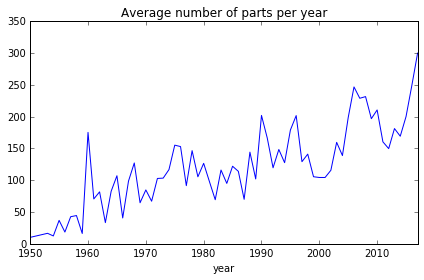

In [10]:
%matplotlib inline
# Read sets data as 'sets'
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: 'parts_by_year'
parts_by_year = sets[['year', 'num_parts']].groupby('year').mean().round(2)
print(parts_by_year.head())

# Plot trends in average number of parts by year
parts_by_year['num_parts'].plot(title='Average number of parts per year')


## Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [12]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).agg({'theme_id': pd.Series.count})
print(themes_by_year.head())

   year  theme_id
0  1950         7
1  1953         4
2  1954        14
3  1955        28
4  1956        12


## Wrapping It All Up!
<p>Lego blocks offer an unlimited amoung of fun across ages. We explored some interesting trends around colors, parts and themes. </p>